# Linear regression project  
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we use the Ames_Housing_Data dataset. This dataset has 81 features describring a range of characteristics of home in Ames sold between 2006 and 2010.

Over this jupyter notebook, I will deal with outliers and missing data, and provide a regression model to predict the sale value giving the home information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ames Housing Dataset

Let's first explore the dataset and the SalePrice.

In [3]:
ames_df = pd.read_csv("Ames_Housing_Data.csv")
ames_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


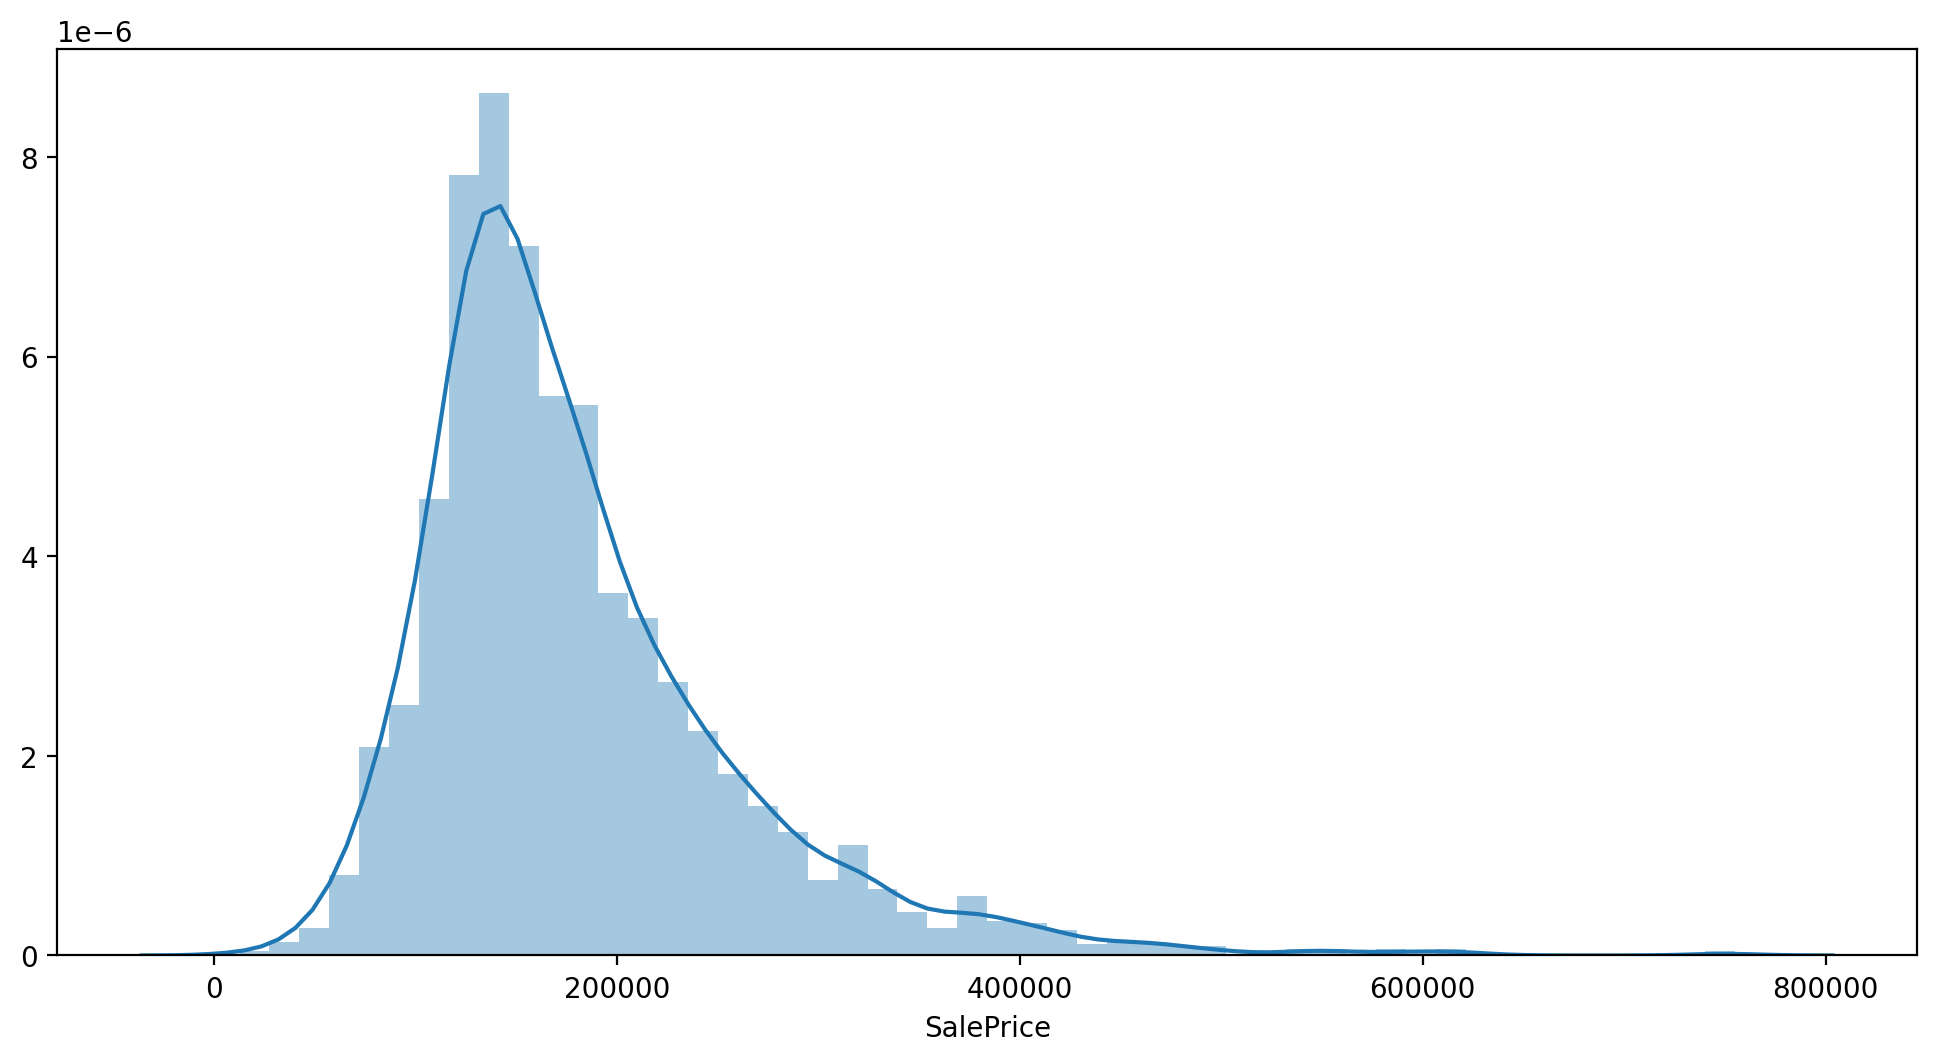

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.distplot(ames_df["SalePrice"])

Let's start looking for outliers.

We can start by checking the features most correlated with *SalePrice*, and see if those that are apparently important in determining *SalePrice* show outliers.

In [13]:
ames_df.corr()["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

We can see that *Overall Qual* seems to be pretty correlated with *SalePrice*. Let's check it with a plot, and see if we can identify any outliers.

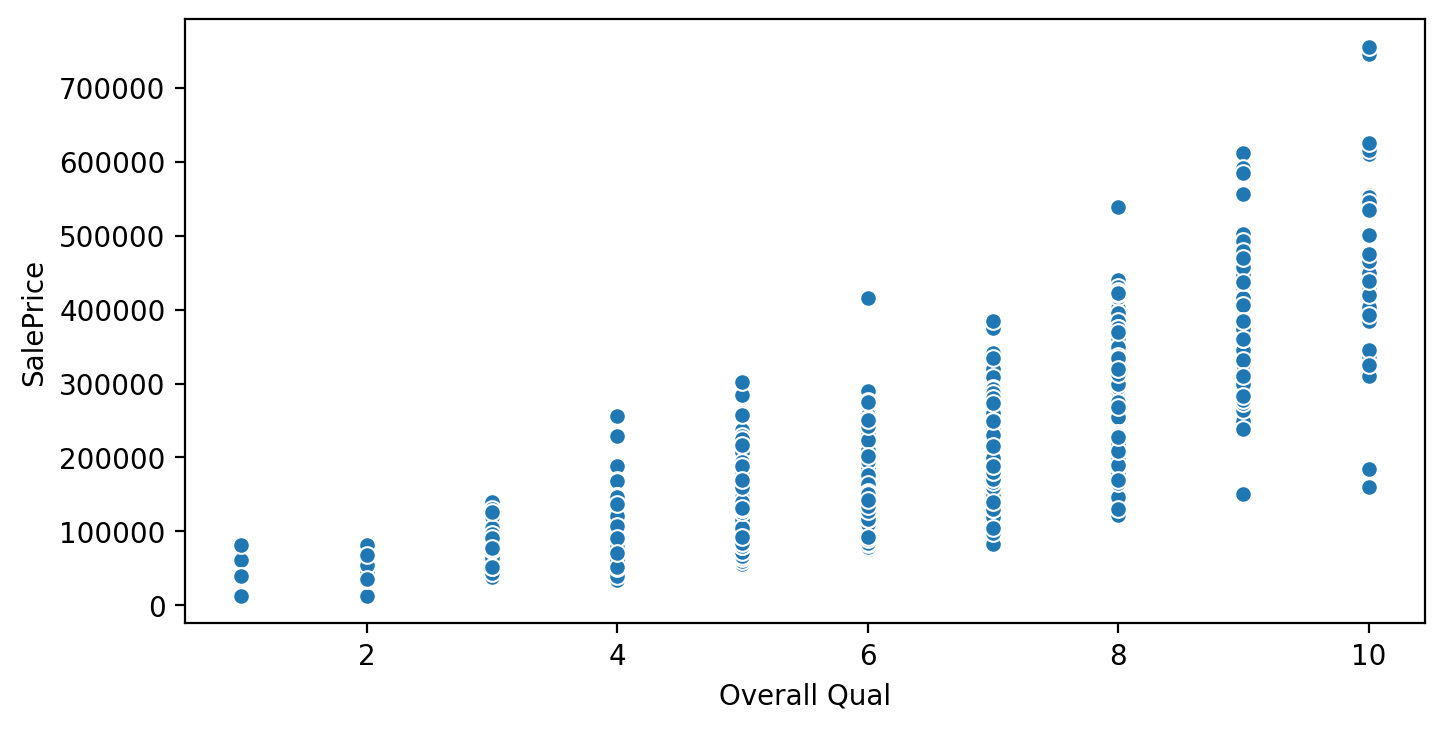

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Overall Qual', y='SalePrice')

We can see some outliers were the *Overall Quality* is really good and the *Sale Price* is really high. And in this context, that makes sense. However, we can see other points were the *Overall Quality* is good, but the *Sale Price* is significally lower. Those points seems outliers in this context. Let's check them.

To do this, we selected those homes with *Overall Qual* greater than 8, whose *Sale Price* was less than 200000.

In [24]:
ames_df[(ames_df['Overall Qual'] > 8) & (ames_df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


We cannot say much more about those points right now, so let's see another highly correlated feature to *SalePrice*, maybe this can help us.

*Gr Liv Area* is the second highest correlated feature to *SalePrice*.

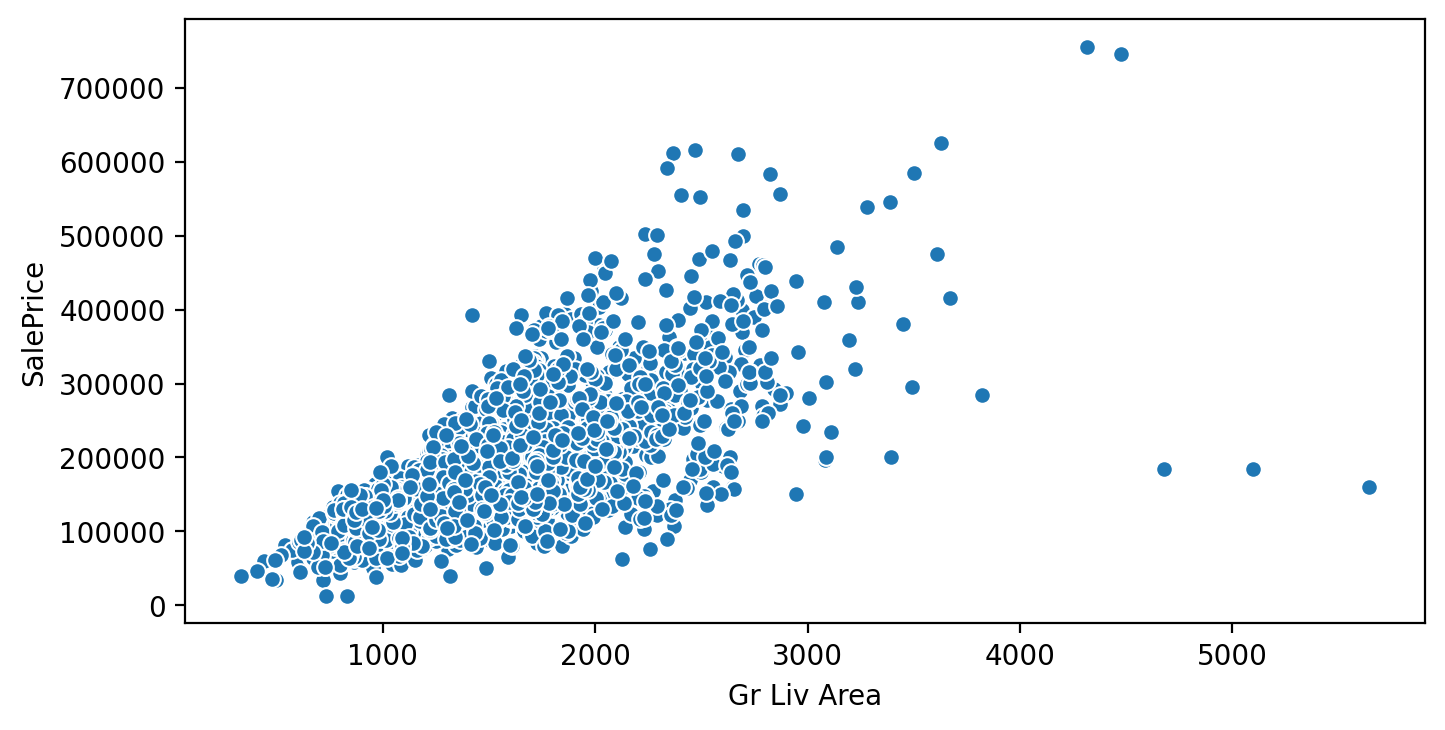

In [25]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Gr Liv Area', y='SalePrice')

We can see some outliers there, with a great living area, but low sale price. Probably, those are the same points we see earlier.

In [26]:
ames_df[(ames_df['Gr Liv Area'] > 4000) & (ames_df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


These are the same rows that we had already seen before. Let's get them out of the dataset and plot again.

In [27]:
indexes_to_remove = ames_df[(ames_df['Gr Liv Area'] > 4000) & (ames_df['SalePrice'] < 400000)].index
ames_df = ames_df.drop(indexes_to_remove, axis=0)

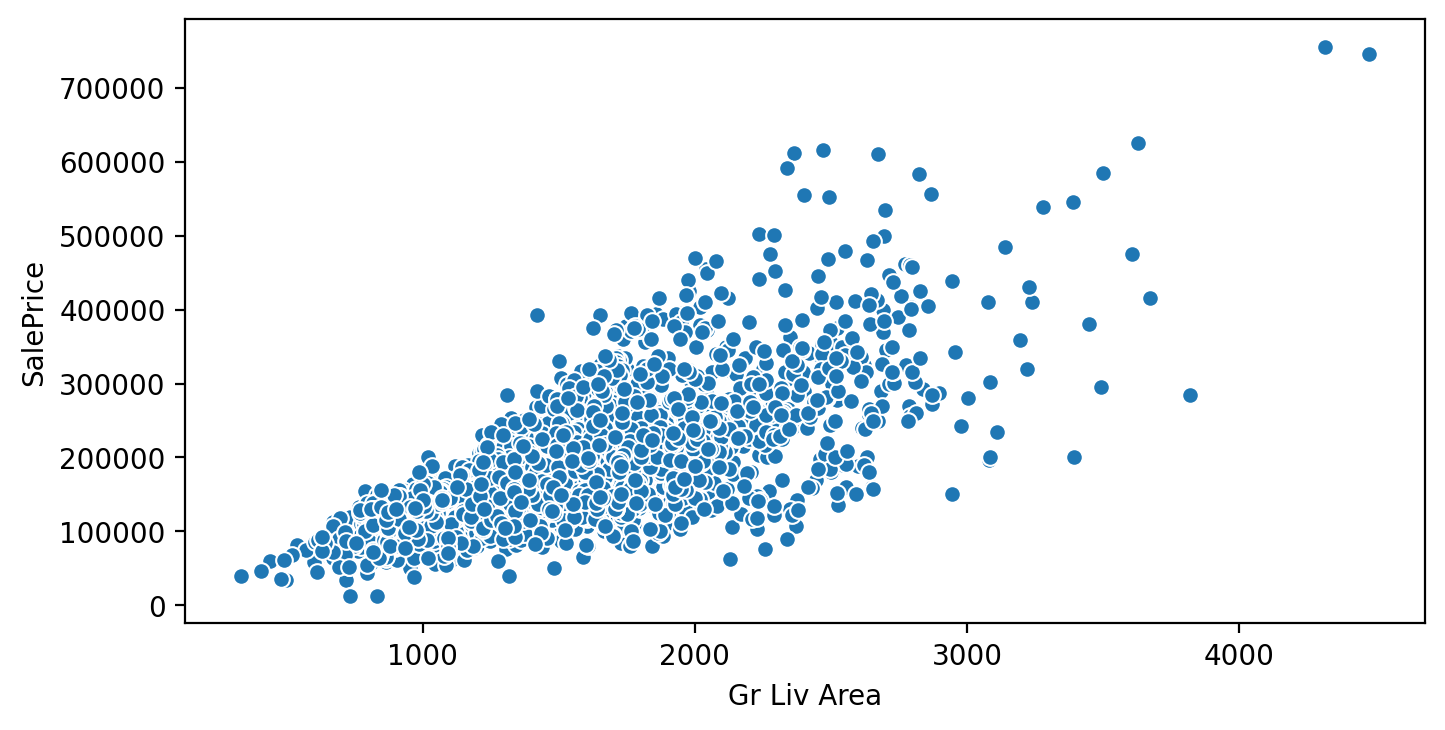

In [28]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Gr Liv Area', y='SalePrice')

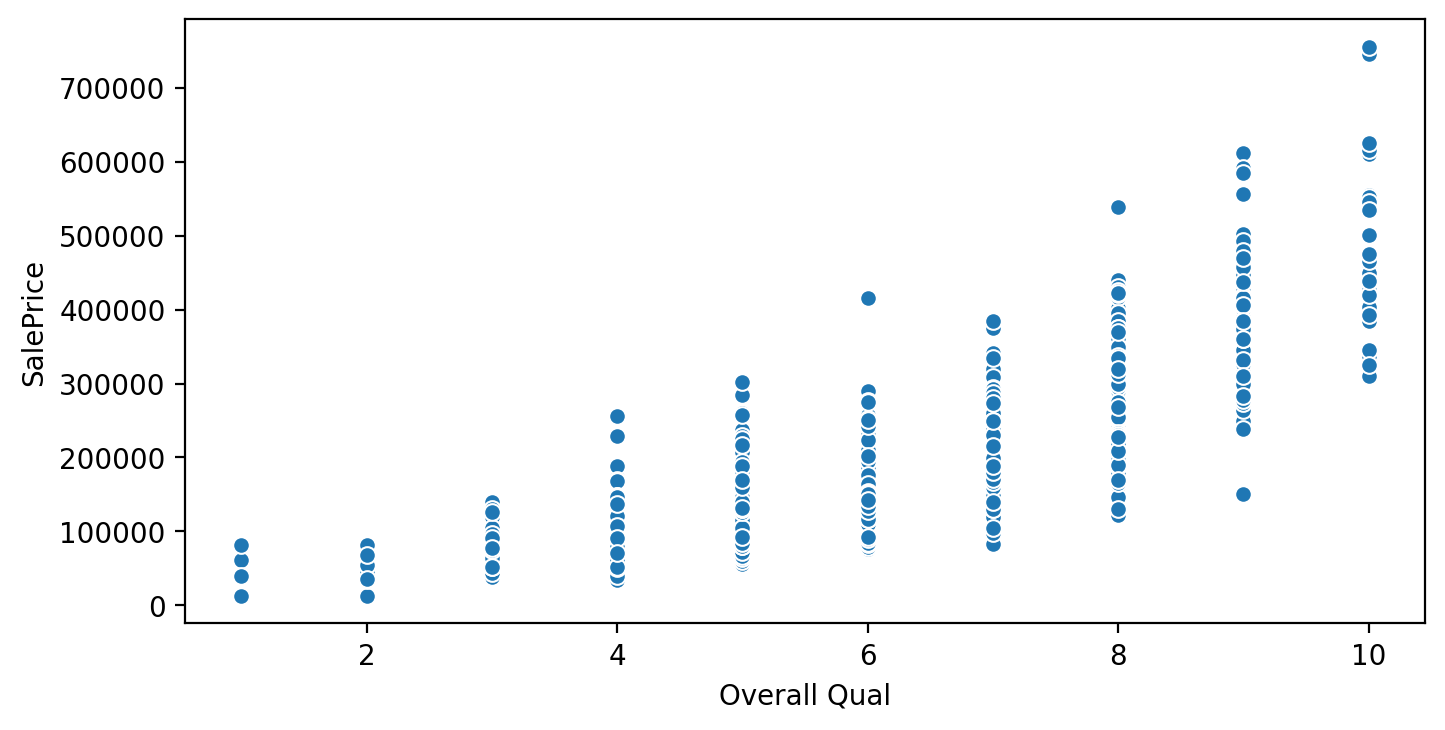

In [29]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Overall Qual', y='SalePrice')

In [30]:
ames_df.to_csv("Ames_outliers_removed.csv", index = False)